In [1]:
A = [-0.066, -0.204,  
              -0.124, -0.079, 
              0.259, 0.565,
              0.289, 0.607,
              -0.318, -0.425,
              -0.015, -0.135,
              -0.060, 0.011,
              0.140, 0.411,
              0.203, 0.350,
              0.249, 0.535,
            -0.229, -0.668,
              0.174, 0.128,
              0.149,0.317,
              -0.343, -0.543,
              -0.308, -0.870]

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.DataFrame(np.array(A).reshape((15,2)), columns = list("xy"))

In [18]:
df

,x,y
0,-0.066,-0.204
1,-0.124,-0.079
2,0.259,0.565
3,0.289,0.607
4,-0.318,-0.425
5,-0.015,-0.135
6,-0.060,0.011
7,0.140,0.411
8,0.203,0.350
9,0.249,0.535


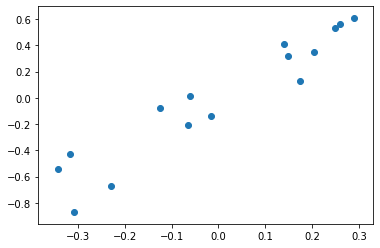

In [20]:
plt.scatter(df.x, df.y)

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents_breast = pca.fit_transform(df)

In [22]:
principalComponents_breast

array([[ 0.21285572],
       [ 0.12377192],
       [-0.62153119],
       [-0.6722469 ],
       [ 0.5192543 ],
       [ 0.1288171 ],
       [ 0.01521539],
       [-0.43179383],
       [-0.40289227],
       [-0.59010536],
       [ 0.70240838],
       [-0.18923982],
       [-0.35026508],
       [ 0.63684298],
       [ 0.91890866]])

In [24]:
len(principalComponents_breast)

15

In [25]:
df.T@df

,x,y
x,0.715524,1.420024
y,1.420024,3.126994


In [27]:
np.linalg.svd(df)

(array([[-1.09421501e-01,  1.06670169e-01,  3.17664402e-01,
          3.45565406e-01, -2.88087242e-01, -5.71993848e-02,
         -1.97612718e-02,  2.11770560e-01,  2.13759744e-01,
          3.02294049e-01, -3.44772942e-01,  1.17969937e-01,
          1.79699362e-01, -3.42826300e-01, -4.52920567e-01],
        [-6.36267090e-02, -3.28397191e-01, -1.12403328e-02,
          2.84350410e-02, -4.55866154e-01,  1.79420717e-01,
         -2.45399418e-01, -1.90642613e-01,  1.53459478e-01,
          3.50063429e-03,  3.04358413e-01,  4.32172181e-01,
          7.58408532e-03, -3.43854865e-01,  3.59636228e-01],
        [ 3.19506915e-01, -9.23568240e-03,  9.07527399e-01,
         -9.89158385e-02,  6.46209980e-02,  2.39747928e-02,
         -4.40783730e-03, -6.92081987e-02, -5.55778252e-02,
         -8.74121293e-02,  1.12425945e-01, -1.63263293e-02,
         -5.17351316e-02,  8.51001295e-02,  1.46032085e-01],
        [ 3.45578046e-01,  3.04388449e-02, -1.01441999e-01,
          8.90220416e-01,  8.54381367

In [29]:
U,S,V = np.linalg.svd(df.T@df)

In [30]:
U

array([[-0.41997158, -0.90753726],
       [-0.90753726,  0.41997158]])

In [55]:
principalComponents_breast.shape

(15, 1)

In [33]:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 1,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [68]:
predicted = U[:,:1] @ principalComponents_breast.T
p = pd.DataFrame(predicted).T

In [69]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

r2 = r2_score(p,df)
rmse = sqrt(mean_squared_error(p, df))

In [70]:
rmse

0.04411887614775731

In [71]:
df

,x,y
0,-0.066,-0.204
1,-0.124,-0.079
2,0.259,0.565
3,0.289,0.607
4,-0.318,-0.425
5,-0.015,-0.135
6,-0.060,0.011
7,0.140,0.411
8,0.203,0.350
9,0.249,0.535


In [84]:
print(df.round(4).T.to_latex())

\begin{tabular}{lrrrrrrrrrrrrrrr}
\toprule
{} &      0 &      1 &      2 &      3 &      4 &      5 &      6 &      7 &      8 &      9 &     10 &     11 &     12 &     13 &     14 \\
\midrule
x & -0.066 & -0.124 &  0.259 &  0.289 & -0.318 & -0.015 & -0.060 &  0.140 &  0.203 &  0.249 & -0.229 &  0.174 &  0.149 & -0.343 & -0.308 \\
y & -0.204 & -0.079 &  0.565 &  0.607 & -0.425 & -0.135 &  0.011 &  0.411 &  0.350 &  0.535 & -0.668 &  0.128 &  0.317 & -0.543 & -0.870 \\
\bottomrule
\end{tabular}



In [79]:
s = 0
for i in range(15):
    s += (df['x'][i] - p[0][i])**2 + (df['y'][i] - p[1][i])**2 
np.sqrt(s)/15.

0.01610993578526887